In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [189]:
# Importação dos conjutos de amostras
dados_treino = pd.read_csv("conjunto_de_treinamento.csv", delimiter=",", decimal=".")
dados_teste = pd.read_csv("conjunto_de_teste.csv", delimiter=",", decimal=".")

# Remoção dos outliers

Como discutido em sala de aula e por recomendação do professor, remove-se os outliers do conjunto de treino.

In [190]:
dados_treino = dados_treino[(dados_treino['preco'] > 50000)&(dados_treino['preco'] < 10000000)]

In [191]:
dados_treino

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,0,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,0,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,0,1,0,0,0,0,0,0,0,780000.0


# Análise dos gráficos

C:\Users\assis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


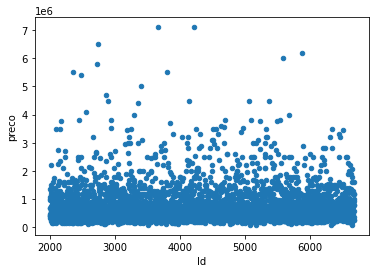

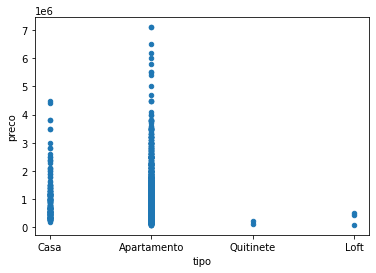

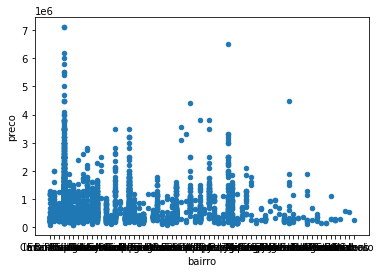

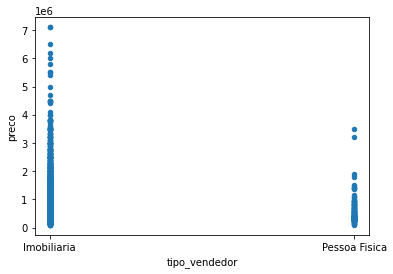

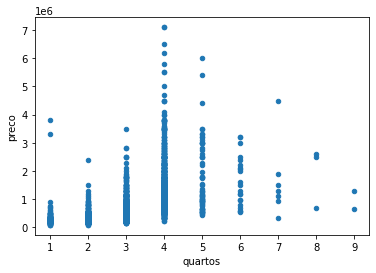

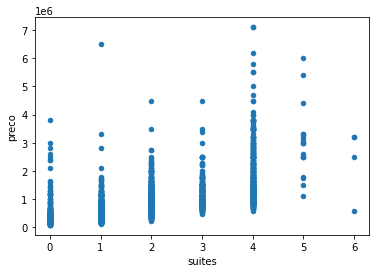

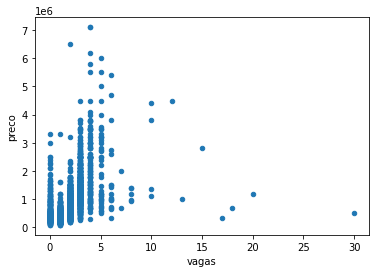

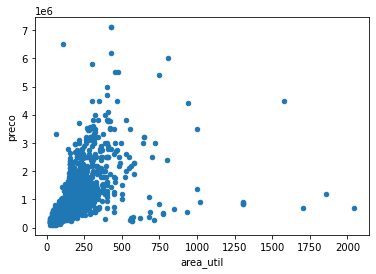

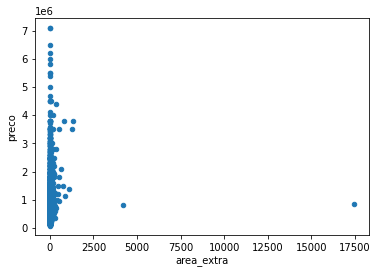

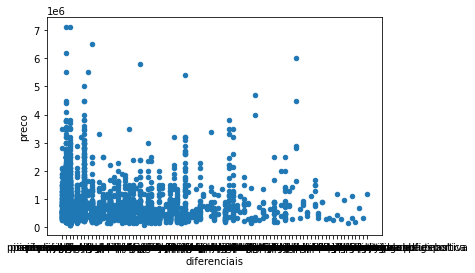

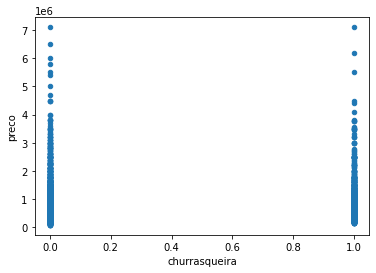

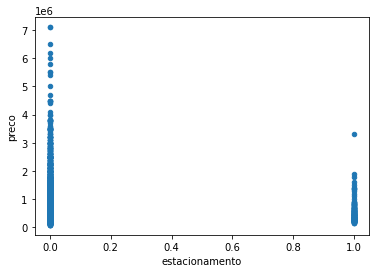

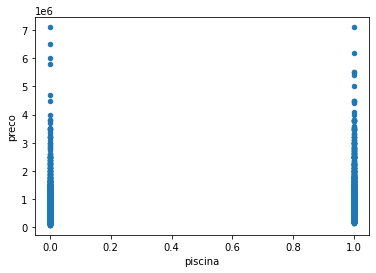

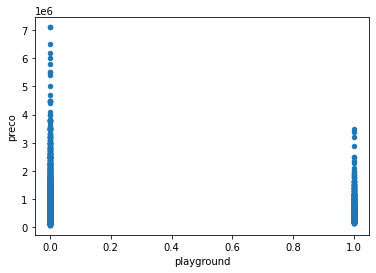

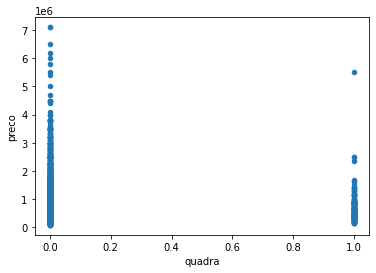

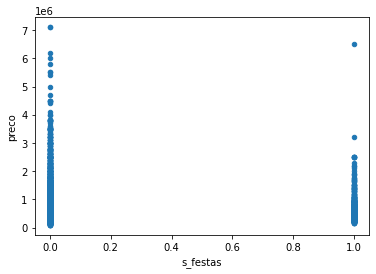

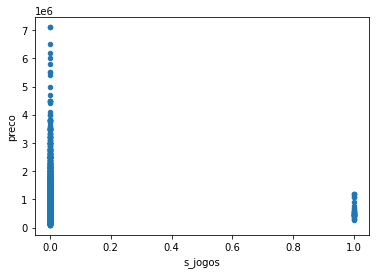

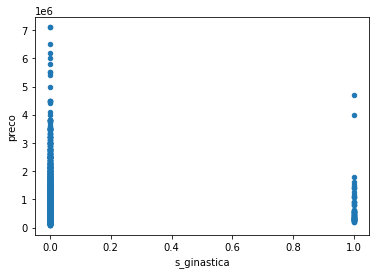

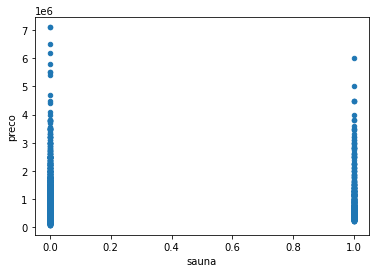

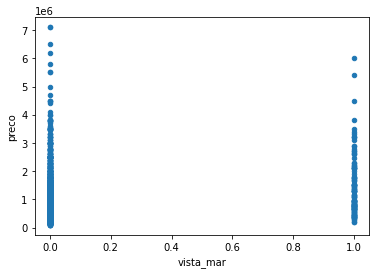

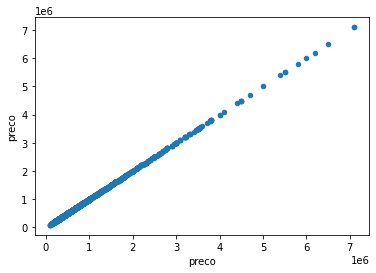

In [192]:
for coluna in dados_treino.columns:
     dados_treino.plot.scatter(x=coluna, y='preco')

In [193]:
colunas_com_outliers = ['area_util', 'area_extra', 'vagas']

# Tratamento dos dados

## Remoção e separação de colunas

In [194]:
# id - remover
# tipo, tipo_vendedor - get_dummies
# bairro - transformar em preço_medio do bairro > x vezes a media dos imoveis
# vagas - tirar outliers
# area_util - tirar outliers
# area_extra - tirar outliers
# diferenciais - remover 

dados_treino = dados_treino.drop(columns=['Id', 'diferenciais'])
dados_teste = dados_teste.drop(columns=['Id', 'diferenciais'])

In [195]:
media_imoveis = dados_treino['preco'].mean()

def classifica_bairros(df):
    classificacao_bairros = {}

    for bairro in df['bairro']:
        media_preco = dados_treino[dados_treino['bairro'] == bairro]['preco'].mean()

        if media_preco <= media_imoveis/6:
            classificacao_bairros[bairro] = 'pobre'
        elif media_preco <= media_imoveis/3:
            classificacao_bairros[bairro] = 'mediano'
        elif media_preco <= media_imoveis:
            classificacao_bairros[bairro] = 'normal'
        elif media_preco >= media_imoveis*4.5:
            classificacao_bairros[bairro] = '5_estrelas'
        elif media_preco >= media_imoveis*2.5:
            classificacao_bairros[bairro] = 'luxo'
        elif media_preco >= media_imoveis:
            classificacao_bairros[bairro] = 'bom'

    return classificacao_bairros

dados_teste['bairro'] = dados_teste['bairro'].map(classifica_bairros(dados_teste))
dados_treino['bairro'] = dados_treino['bairro'].map(classifica_bairros(dados_treino))

## Substituindo valores NaN

In [196]:
print("Dados NULL por coluna no conjunto de treino")
print(dados_treino.isnull().sum(), end='\n\n')
print("Dados NULL por coluna no conjunto de teste")
print(dados_teste.isnull().sum())

Dados NULL por coluna no conjunto de treino
tipo              0
bairro            0
tipo_vendedor     0
quartos           0
suites            0
vagas             0
area_util         0
area_extra        0
churrasqueira     0
estacionamento    0
piscina           0
playground        0
quadra            0
s_festas          0
s_jogos           0
s_ginastica       0
sauna             0
vista_mar         0
preco             0
dtype: int64

Dados NULL por coluna no conjunto de teste
tipo              0
bairro            4
tipo_vendedor     0
quartos           0
suites            0
vagas             0
area_util         0
area_extra        0
churrasqueira     0
estacionamento    0
piscina           0
playground        0
quadra            0
s_festas          0
s_jogos           0
s_ginastica       0
sauna             0
vista_mar         0
dtype: int64


## Splitando variáveis categóricas

In [197]:
dados_teste[['bairro']] = dados_teste[['bairro']].fillna('normal')

In [198]:
valores_a_trocar = ['tipo', 'tipo_vendedor', 'bairro']

dados_treino = pd.get_dummies(dados_treino, columns=valores_a_trocar)
dados_teste = pd.get_dummies(dados_teste, columns=valores_a_trocar)

# Removendo Outliers

In [199]:
dados_treino = dados_treino.astype(float)
dados_teste = dados_teste.astype(float)

In [200]:
# avaliar apenas em colunas com falsos 
for coluna in colunas_com_outliers:
    Q1 = np.percentile(dados_treino[coluna], 25,
                   method = 'midpoint')
 
    Q3 = np.percentile(dados_treino[coluna], 75,
                   method = 'midpoint')
    IQR = Q3 - Q1
 
    max_ = Q3+1.5*IQR
    min_ = Q1-1.5*IQR
    
 
    dados_treino.loc[dados_treino[coluna] < min_, coluna] = np.nan
    dados_treino.loc[dados_treino[coluna] > max_, coluna] = np.nan

In [201]:
dados_treino.isnull().sum()

quartos                          0
suites                           0
vagas                          191
area_util                      245
area_extra                     549
churrasqueira                    0
estacionamento                   0
piscina                          0
playground                       0
quadra                           0
s_festas                         0
s_jogos                          0
s_ginastica                      0
sauna                            0
vista_mar                        0
preco                            0
tipo_Apartamento                 0
tipo_Casa                        0
tipo_Loft                        0
tipo_Quitinete                   0
tipo_vendedor_Imobiliaria        0
tipo_vendedor_Pessoa Fisica      0
bairro_bom                       0
bairro_luxo                      0
bairro_mediano                   0
bairro_normal                    0
dtype: int64

In [202]:
for coluna in colunas_com_outliers:
    dados_treino[[coluna]] = dados_treino[[coluna]].fillna(dados_treino[coluna].median())

## Escalando os dados

In [203]:
dados_treino

,quartos,suites,vagas,area_util,area_extra,churrasqueira,estacionamento,piscina,playground,quadra,...,tipo_Apartamento,tipo_Casa,tipo_Loft,tipo_Quitinete,tipo_vendedor_Imobiliaria,tipo_vendedor_Pessoa Fisica,bairro_bom,bairro_luxo,bairro_mediano,bairro_normal
0,3.0,3.0,1.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4.0,4.0,2.0,157.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,1.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,3.0,2.0,149.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2.0,1.0,1.0,54.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,4.0,4.0,3.0,170.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4679,2.0,0.0,1.0,82.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4680,3.0,1.0,1.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4681,3.0,2.0,3.0,136.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Separação dos dados

In [204]:
#separacao do conjunto de treino em alvo e features e em subconjunto de teste e treino
dados_treino = dados_treino.sample(frac=1, random_state=135)

X = dados_treino.drop(columns=['preco'])
Y = dados_treino['preco']

# usados para metrificar o modelo final
teste_sample = 0.85
x_treino = X[:int(len(X)*teste_sample)]
y_treino = Y[:int(len(X)*teste_sample)]

x_teste = X[int(len(X)*teste_sample):]
y_teste = Y[int(len(X)*teste_sample):]

In [205]:
# talvez escalar antes de separar
standard_scaler =  StandardScaler() #MinMaxScaler()
X = standard_scaler.fit_transform(X)